In [2]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv('finalV2.csv')

/var/folders/j_/r9p377l96x53wfwmdtb_19p40000gn/T/ipykernel_33911/2029129412.py:1: DtypeWarning: Columns (21,22,23,24,25,32,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('finalV2.csv')


In [4]:
min(pd.to_datetime(df["Inbetriebnahmedatum der Einheit"]))

Timestamp('2000-01-01 00:00:00')

In [5]:
df.head()

,Unnamed: 0,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
0,0,SEE999362946432,Wohnhaus Maihingen,In Betrieb,Solare Strahlungsenergie,"3,6","2,5",4/2/2003,10/27/2020,Bayern,...,SEL968896587787,EEG980127202344,E12974010000000000000022739800001,4/2/2003,"3,6",NaN,NaN,NaN,NaN,NaN
1,1,SEE988155391009,BHKW Marina Dürrwächter,In Betrieb,Erdgas,"5,5","5,5",4/2/2003,12/21/2020,Baden-Württemberg,...,SEL927043742097,NaN,NaN,NaN,NaN,NaN,KWK923935420784,4/2/2003,"5,5",12
2,2,SEE979286129425,Hausdach,In Betrieb,Solare Strahlungsenergie,"4,8",4,4/2/2003,12/22/2020,Bayern,...,SEL983117889853,EEG973640124828,E21875011000000000000308693500000,4/2/2003,"4,8",NaN,NaN,NaN,NaN,NaN
3,3,SEE953450471473,Tausend Dächer,In Betrieb,Solare Strahlungsenergie,"4,48","4,48",4/2/2003,1/12/2021,Bayern,...,SEL945060926146,EEG970830863277,E31177010000000005007469059-00000,4/2/2003,"4,48",NaN,NaN,NaN,NaN,NaN
4,4,SEE975030985910,anlage5,In Betrieb,Solare Strahlungsenergie,"4,6",4,4/2/2003,1/25/2021,Bayern,...,SEL938107355801,EEG994408707558,NaN,4/2/2003,"4,6",NaN,NaN,NaN,NaN,NaN


In [6]:
# Unique values across multiple energy sources.
df["Betriebs-Status"].unique()

array(['In Betrieb', 'Endgültig stillgelegt', 'Vorübergehend stillgelegt',
       'In Planung'], dtype=object)

In [7]:
my_columns = [
    "Betriebs-Status",
    "Energieträger",
    "Lage der Einheit",
    "Bruttoleistung der Einheit",
    "Nettonennleistung der Einheit",
    "Bundesland",
    "Datum der geplanten Inbetriebnahme",
    "Inbetriebnahmedatum der Einheit"
]

In [8]:
# Pick only the desired columns.
filtered_data = df[my_columns]
filtered_data = filtered_data[filtered_data["Betriebs-Status"] == 'In Planung']

In [9]:
filtered_data.tail()

,Betriebs-Status,Energieträger,Lage der Einheit,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Bundesland,Datum der geplanten Inbetriebnahme,Inbetriebnahmedatum der Einheit
1374640,In Planung,Solare Strahlungsenergie,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)","4,05",3,Bayern,4/30/2022,5/12/2022
1374699,In Planung,Solare Strahlungsenergie,Steckerfertige Erzeugungsanlage (sog. Plug-In-...,"0,8","0,6",Bayern,4/23/2022,5/5/2022
1374989,In Planung,Solare Strahlungsenergie,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)","6,63","6,63",Bayern,5/23/2022,5/13/2022
1413919,In Planung,Solare Strahlungsenergie,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)","7,4",7,Baden-Württemberg,12/1/2020,12/7/2020
1416052,In Planung,Solare Strahlungsenergie,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)","7,36","4,6",Bayern,12/22/2020,12/23/2020


In [10]:
# Convert to datetime
filtered_data["Datum der geplanten Inbetriebnahme"] = pd.to_datetime(
    filtered_data["Datum der geplanten Inbetriebnahme"]
)

In [11]:
filtered_data["Datum der geplanten Inbetriebnahme"] = pd.to_datetime(
    filtered_data["Datum der geplanten Inbetriebnahme"]
)

In [12]:
# Pick only enery sources as well as planned date (Remove outlier).
timeline_planned = filtered_data[["Energieträger", "Datum der geplanten Inbetriebnahme"]]
timeline_planned = timeline_planned[timeline_planned["Datum der geplanten Inbetriebnahme"] < '2024-01-01']

In [13]:
timeline_planned.groupby("Energieträger").count()

,Datum der geplanten Inbetriebnahme
Energieträger,
Solare Strahlungsenergie,40
Speicher,13
Wärme,2


- We have in total 54 Planned units distributed as follows:
    - 39 for Solare Strahlungsenergie
    - 13 Speicher
    - 2 Wärme

### Time line for only "In Planning"

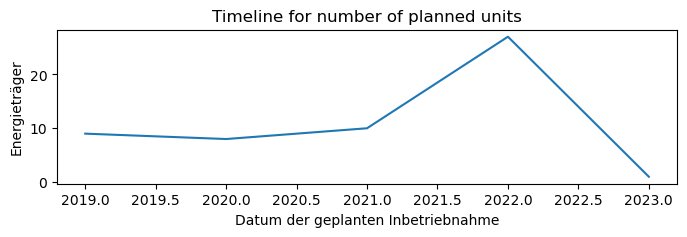

In [14]:
plt.rcParams["figure.figsize"] = [8.00, 2.00]
sns.lineplot(data = timeline_planned['Energieträger'].groupby(
    [timeline_planned["Datum der geplanten Inbetriebnahme"].dt.year]
).agg('count')).set_title("Timeline for number of planned units")
plt.savefig('PlannedUnits.PNG')

In [15]:
filtered_data["Lage der Einheit"].unique()

array(['Bauliche Anlagen (Hausdach, Gebäude und Fassade)', nan,
       'Steckerfertige Erzeugungsanlage (sog. Plug-In- oder Balkon-PV-Anlage)',
       'Bauliche Anlagen (Sonstige)', 'Freifläche'], dtype=object)

In [16]:
filtered_data[filtered_data["Energieträger"] == "Solare Strahlungsenergie"].groupby("Lage der Einheit").count()

,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Bundesland,Datum der geplanten Inbetriebnahme,Inbetriebnahmedatum der Einheit
Lage der Einheit,,,,,,,
"Bauliche Anlagen (Hausdach, Gebäude und Fassade)",56,56,56,56,56,35,56
Bauliche Anlagen (Sonstige),2,2,2,2,2,1,2
Freifläche,1,1,1,1,1,1,1
Steckerfertige Erzeugungsanlage (sog. Plug-In- oder Balkon-PV-Anlage),11,11,11,11,11,4,11


### Number of planned units for each enery source.

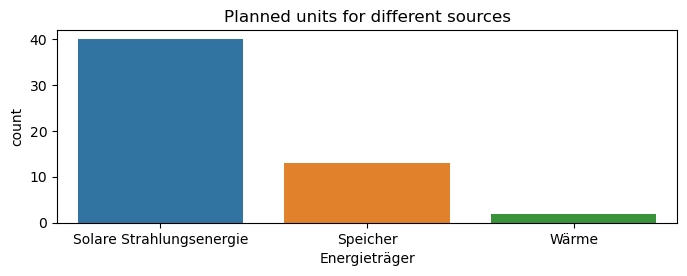

In [17]:
# plot number of planned units for each enery source.
plt.rcParams["figure.figsize"] = [8.00, 2.5]
sns.countplot(x=timeline_planned["Energieträger"]).set_title('Planned units for different sources')
plt.savefig('Final/2-PlannedUnitsForDifferentRes.PNG')

In [18]:
# Pick only the desired columns and the working units.
filtered_data_operating = df[my_columns]
filtered_data_operating = filtered_data_operating[filtered_data_operating["Betriebs-Status"] == 'In Betrieb']

In [19]:
filtered_data_open_area = filtered_data_operating.copy()

In [20]:
filtered_data_open_area["Lage der Einheit"].unique()

array(['Bauliche Anlagen (Hausdach, Gebäude und Fassade)', nan,
       'Bauliche Anlagen (Sonstige)', 'Windkraft an Land', 'Freifläche',
       'Steckerfertige Erzeugungsanlage (sog. Plug-In- oder Balkon-PV-Anlage)'],
      dtype=object)

In [21]:
open_area = filtered_data_open_area[filtered_data_open_area["Lage der Einheit"] == "Freifläche"]

In [22]:
open_area.groupby("Bundesland").count()

,Betriebs-Status,Energieträger,Lage der Einheit,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Datum der geplanten Inbetriebnahme,Inbetriebnahmedatum der Einheit
Bundesland,,,,,,,
Baden-Württemberg,891,891,891,891,891,0,891
Bayern,4354,4354,4354,4354,4354,0,4354


In [23]:
open_area.groupby("Bundesland").count()

,Betriebs-Status,Energieträger,Lage der Einheit,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Datum der geplanten Inbetriebnahme,Inbetriebnahmedatum der Einheit
Bundesland,,,,,,,
Baden-Württemberg,891,891,891,891,891,0,891
Bayern,4354,4354,4354,4354,4354,0,4354


## Question: What are the number of PV open spaces in both states?

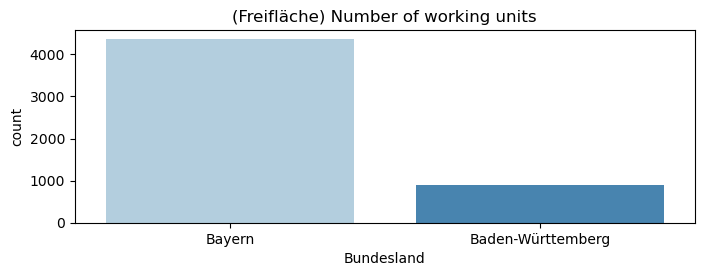

In [24]:
sns.countplot(data=open_area, x="Bundesland", palette='Blues').set_title("(Freifläche) Number of working units")
plt.savefig('Final/3-FreiWorking.PNG')
pass

## Question: Number Of working units in each state?

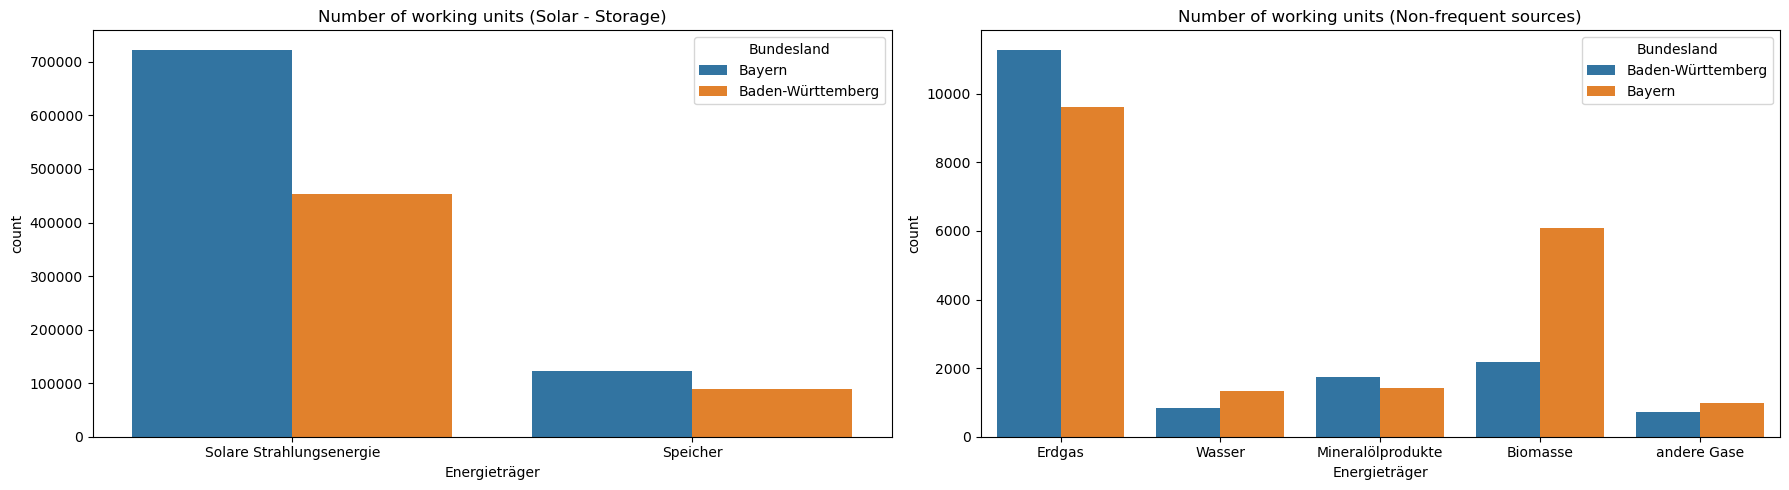

In [25]:
# Split the energy sources into frequent and non-frequent resources
top_energy_sources = ["Solare Strahlungsenergie", "Speicher"]
lower_energy_sources = ["Erdgas", "wind", "andere Gase", "Biomasse",
                        "Mineralölprodukte", "Wasser"]

# Filter the data accordingly.
frequent = filtered_data_operating[filtered_data_operating["Energieträger"].isin(top_energy_sources)]
non_frequent = filtered_data_operating[filtered_data_operating["Energieträger"].isin(lower_energy_sources)]

# Plot the data on two different axes
plt.rcParams["figure.figsize"] = [18.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, 2)

sns.countplot(data=frequent, x="Energieträger", hue="Bundesland",ax=ax[0]
             ).set_title('Number of working units (Solar - Storage)')
sns.countplot(data=non_frequent, x="Energieträger", hue="Bundesland", ax=ax[1]
             ).set_title('Number of working units (Non-frequent sources)')
plt.savefig('3-EnergeySources.PNG')

In [26]:
timeline_open_area = filtered_data_operating.copy()
timeline_open_area = timeline_open_area[(timeline_open_area["Lage der Einheit"] == "Freifläche")]


In [27]:
timeline_open_area["Betriebs-Status"].unique()

array(['In Betrieb'], dtype=object)

In [28]:
timeline_open_area["Inbetriebnahmedatum der Einheit"] = pd.to_datetime(
    timeline_open_area["Inbetriebnahmedatum der Einheit"]
)

In [29]:
agg_open_area = timeline_open_area['Energieträger'].groupby(
    [timeline_open_area["Inbetriebnahmedatum der Einheit"].dt.year, timeline_open_area["Bundesland"]]
).agg('count').to_frame()

In [30]:
agg_open_area.head()

Energieträger
Inbetriebnahmedatum der Einheit Bundesland                      
2000                            Baden-Württemberg              9
                                Bayern                         8
2001                            Baden-Württemberg             16
                                Bayern                        37
2002                            Baden-Württemberg             12

In [32]:
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [33]:
df = pd.DataFrame(list(zip(bw, bayern)),
               columns =['bw', 'bayern'], index = year)

In [34]:
df.head()

,bw,bayern
2000,9,8
2001,16,37
2002,12,155
2003,10,44
2004,14,104


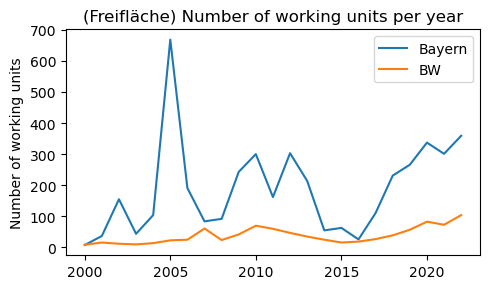

In [35]:
fig, ax = plt.subplots()
sns.lineplot(
    data = df,
    x = df.index,
    y = "bayern",
    ax = ax
)
sns.lineplot(
    data = df,
    x = df.index,
    y = "bw",
    ax = ax
)
ax.legend(["Bayern","BW"])
plt.ylabel("Number of working units")
plt.title("(Freifläche) Number of working units per year")
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.savefig('Final/5-OpenAreaPerYearAgg.PNG')
pass

## Question: Number of Installed units per year?

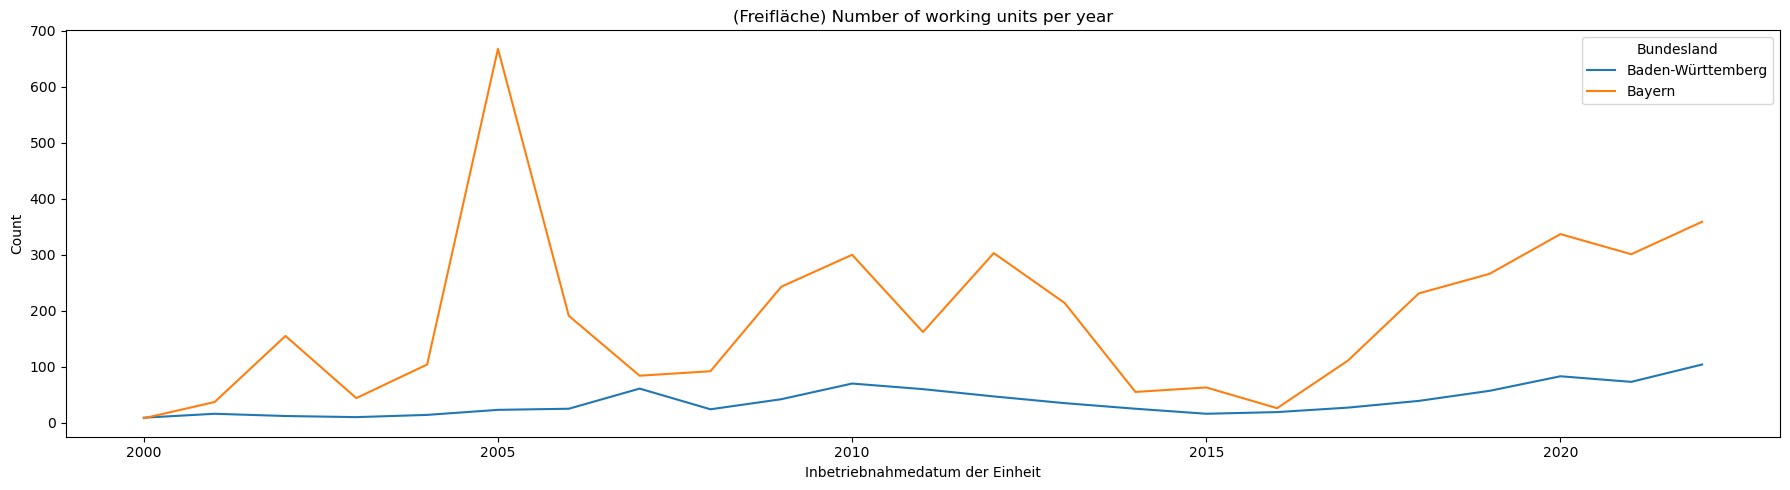

In [37]:
sns.lineplot(
    data = agg_open_area,
    x = "Inbetriebnahmedatum der Einheit",
    y = "Energieträger",
    hue = "Bundesland"
).set_title("(Freifläche) Number of working units per year")
plt.ylabel("Count")
plt.savefig('Final/4-OpenAreaPerYear.PNG')
pass

In [38]:
# Filter by energy sources
timeline_installed_high = filtered_data_operating.copy()
timeline_installed_low  = filtered_data_operating.copy()

timeline_installed_high = timeline_installed_high[
    timeline_installed_high["Energieträger"].isin(top_energy_sources)
]
timeline_installed_low  = timeline_installed_low[
    timeline_installed_low["Energieträger"].isin(lower_energy_sources)
]

# Convert string to dates
timeline_installed_high["Inbetriebnahmedatum der Einheit"] = pd.to_datetime(
    timeline_installed_high["Inbetriebnahmedatum der Einheit"]
)
timeline_installed_low["Inbetriebnahmedatum der Einheit"]  = pd.to_datetime(
    timeline_installed_low["Inbetriebnahmedatum der Einheit"]
)

# Aggregate the values (Group by Year) (Count *)
agg_timeline_high = timeline_installed_high['Energieträger'].groupby(
    [timeline_installed_high["Inbetriebnahmedatum der Einheit"].dt.year, timeline_installed_high["Bundesland"]]
).agg('count').to_frame()
agg_timeline_low = timeline_installed_low['Energieträger'].groupby(
    [timeline_installed_low["Inbetriebnahmedatum der Einheit"].dt.year, timeline_installed_low["Bundesland"]]
).agg('count').to_frame()

In [39]:
agg_timeline_high.head()

Energieträger
Inbetriebnahmedatum der Einheit Bundesland                      
2000                            Baden-Württemberg           1436
                                Bayern                      3323
2001                            Baden-Württemberg           5114
                                Bayern                      7766
2002                            Baden-Württemberg           5128

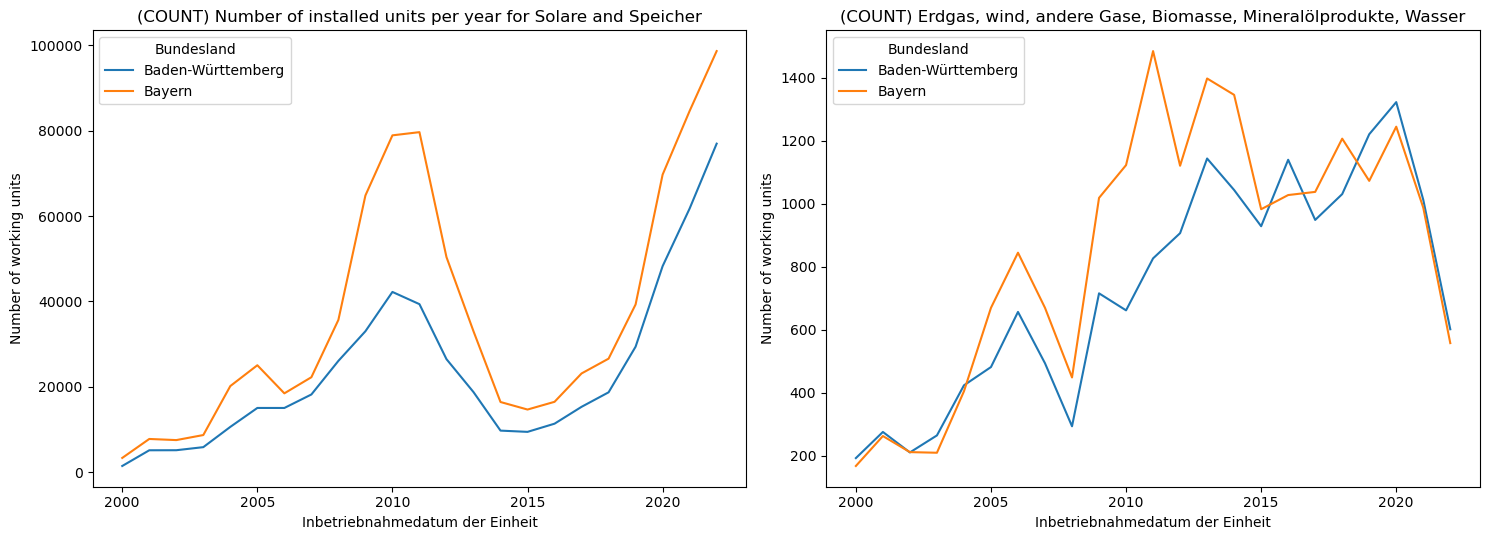

In [43]:
# Plot both sources
plt.rcParams["figure.figsize"] = [15.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, 2)

sns.lineplot(
    data = agg_timeline_high,
    x = "Inbetriebnahmedatum der Einheit",
    y = "Energieträger",
    hue = "Bundesland",
    ax = ax[0],
).set_title("(COUNT) Number of installed units per year for Solare and Speicher")


sns.lineplot(
    data = agg_timeline_low,
    x = "Inbetriebnahmedatum der Einheit",
    y = "Energieträger",
    hue = "Bundesland",
    ax = ax[1],
).set_title("(COUNT) Erdgas, wind, andere Gase, Biomasse, Mineralölprodukte, Wasser")

ax[0].set_ylabel("Number of working units")
ax[1].set_ylabel("Number of working units")
plt.savefig('final/6-InstalledSources.PNG')

## Not in Operation Nor In Planning

In [44]:
df.head()

,bw,bayern
2000,9,8
2001,16,37
2002,12,155
2003,10,44
2004,14,104


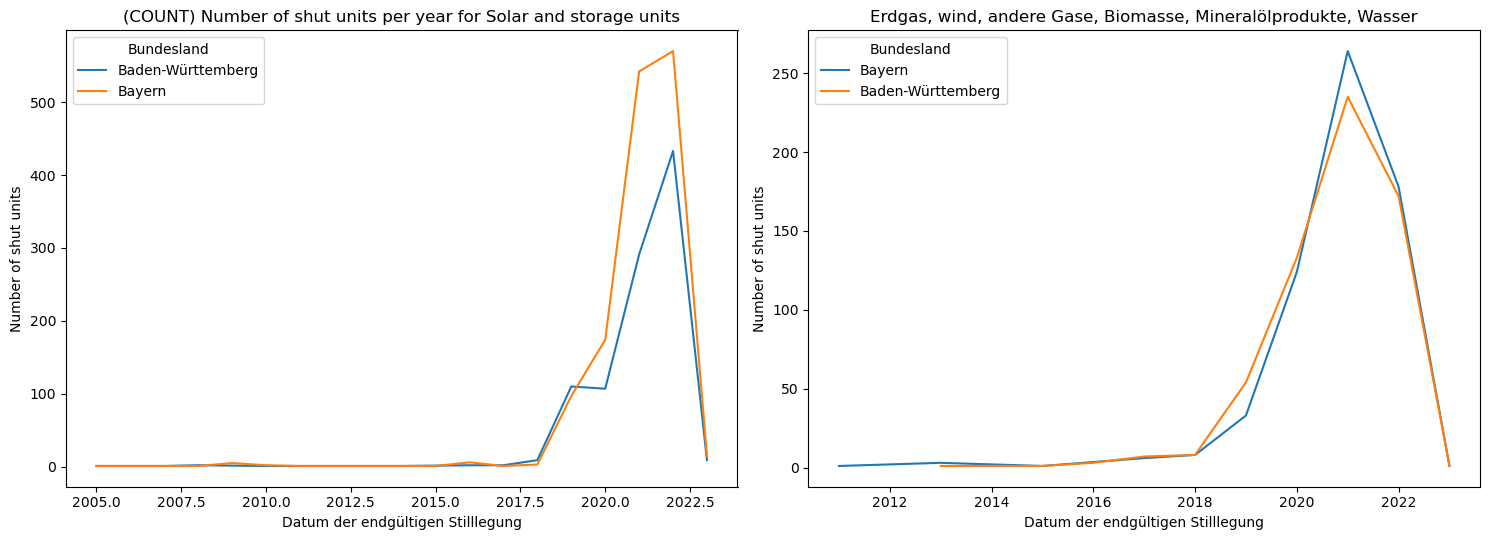

In [104]:
# Plot both sources
plt.rcParams["figure.figsize"] = [15.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, 2)

sns.lineplot(
    data = agg_timeline_shut_high,
    x = "Datum der endgültigen Stilllegung",
    y = "Energieträger",
    hue = "Bundesland",
    ax = ax[0],
).set_title("(COUNT) Number of shut units per year for Solar and storage units")

sns.lineplot(
    data = agg_timeline_shut_low,
    x = "Datum der endgültigen Stilllegung",
    y = "Energieträger",
    hue = "Bundesland",
    ax = ax[1],
).set_title("Erdgas, wind, andere Gase, Biomasse, Mineralölprodukte, Wasser")

ax[0].set_ylabel("Number of shut units")
ax[1].set_ylabel("Number of shut units")

plt.savefig('final/7-ShutUnits.PNG')

In [105]:
# Convert dates into a datetime.
filtered_data_shut["Datum der geplanten Inbetriebnahme"] = pd.to_datetime(
    filtered_data_shut["Datum der endgültigen Stilllegung"]
)
filtered_data_shut["Datum der geplanten Inbetriebnahme"] = pd.to_datetime(
    filtered_data_shut["Datum der geplanten Inbetriebnahme"]
)

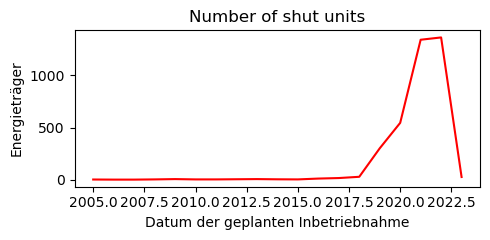

In [106]:
plt.rcParams["figure.figsize"] = [5.00, 2.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, 1)

sns.lineplot(data = filtered_data_shut['Energieträger'].groupby(
    [filtered_data_shut["Datum der geplanten Inbetriebnahme"].dt.year]
).agg('count'), ax=ax, color='r').set_title("Number of shut units")

plt.savefig('6-NumberOfShutUnits.PNG')

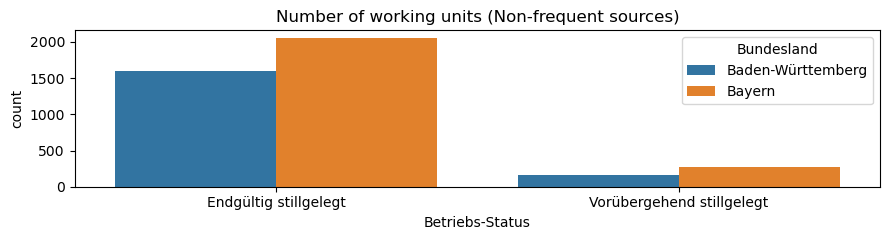

In [107]:
plt.rcParams["figure.figsize"] = [9.00, 2.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, 1)

sns.countplot(data=filtered_data_shut, x="Betriebs-Status", hue="Bundesland", ax=ax
             ).set_title('Number of working units (Non-frequent sources)')
plt.savefig('7-ClosedUnits.PNG')

In [82]:
def convert_column_data_type(dataframe, column_type, column_names=[]):
    for column in column_names: 
        dataframe[column] = dataframe[column].str.replace(',','.').astype(column_type)
    return dataframe

In [83]:
net_vs_gross_trend = df.copy()
net_vs_gross_trend = convert_column_data_type(net_vs_gross_trend, float ,["Nettonennleistung der Einheit"])
net_vs_gross_trend = convert_column_data_type(net_vs_gross_trend, float ,["Bruttoleistung der Einheit"])

In [84]:
energy_sources = net_vs_gross_trend.Energieträger.unique()

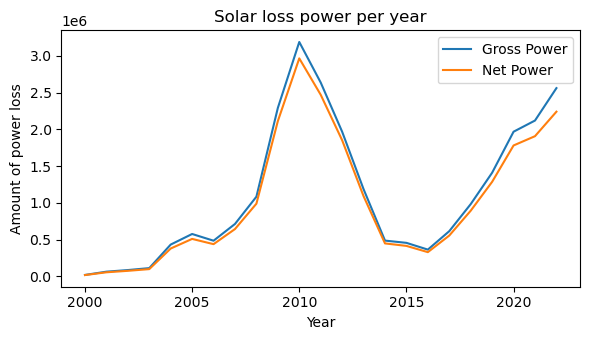

In [88]:

for energy_source in energy_sources:
    net_vs_gross_trend = df.copy()
    net_vs_gross_trend = net_vs_gross_trend[net_vs_gross_trend.Energieträger == energy_source]
    net_vs_gross_trend = convert_column_data_type(net_vs_gross_trend, float ,["Nettonennleistung der Einheit"])
    net_vs_gross_trend = convert_column_data_type(net_vs_gross_trend, float ,["Bruttoleistung der Einheit"])
    net_vs_gross_trend = net_vs_gross_trend[my_columns]
    net_vs_gross_trend["Inbetriebnahmedatum der Einheit"] = pd.to_datetime(
        net_vs_gross_trend["Inbetriebnahmedatum der Einheit"]
    ).dt.year
    net_trend = net_vs_gross_trend[["Nettonennleistung der Einheit", "Inbetriebnahmedatum der Einheit"]]
    gross_trend = net_vs_gross_trend[["Bruttoleistung der Einheit", "Inbetriebnahmedatum der Einheit"]]
    # # gross_trend = convert_column_data_type(gross_trend, float ,["Bruttoleistung der Einheit"])
    # net_trend = convert_column_data_type(net_trend, float ,["Nettonennleistung der Einheit"])
    gross_trend = gross_trend.groupby(["Inbetriebnahmedatum der Einheit"]).sum()
    net_trend = net_trend.groupby(["Inbetriebnahmedatum der Einheit"]).sum()
    merged = pd.merge(gross_trend, net_trend, on='Inbetriebnahmedatum der Einheit', how='outer')
    plt.rcParams["figure.figsize"] = [6.00, 3.50]
    plt.plot(merged.index, merged["Bruttoleistung der Einheit"], label = "Gross Power")
    plt.plot(merged.index, merged["Nettonennleistung der Einheit"] , label = "Net Power")
    
    plt.legend()
    plt.savefig(energy_source+'lines.PNG')
    plt.title("Solar loss power per year")
    plt.ylabel("Amount of power loss")
    plt.xlabel("Year")
    plt.show()
    break

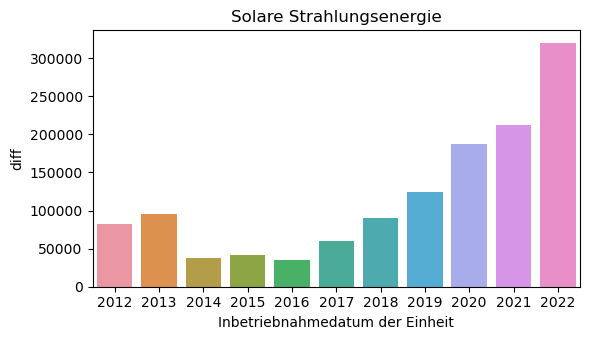

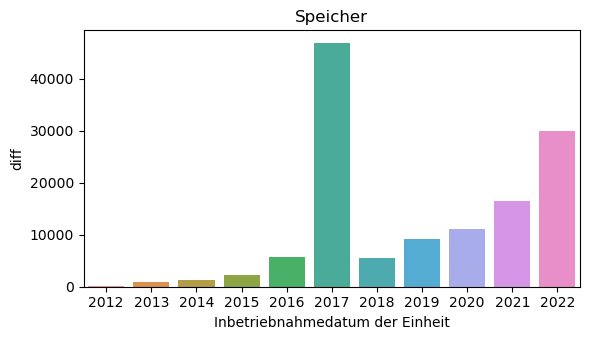

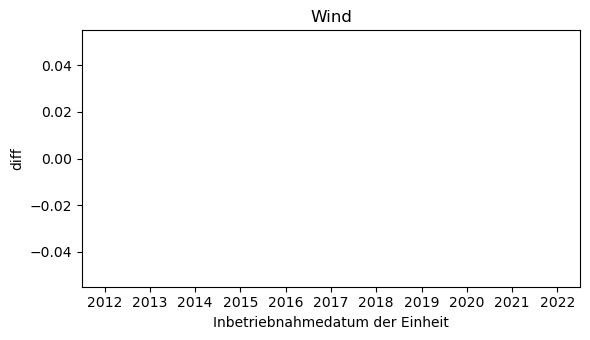

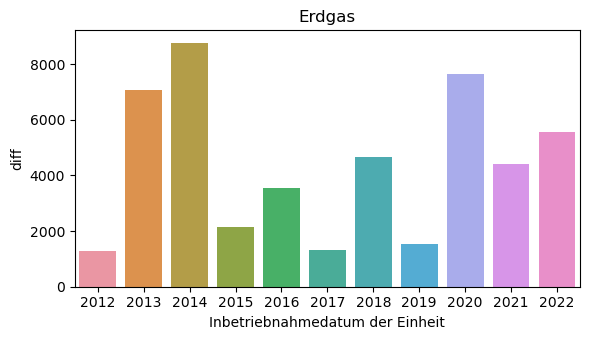

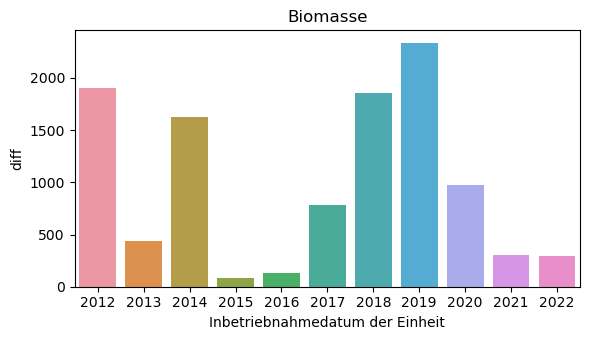

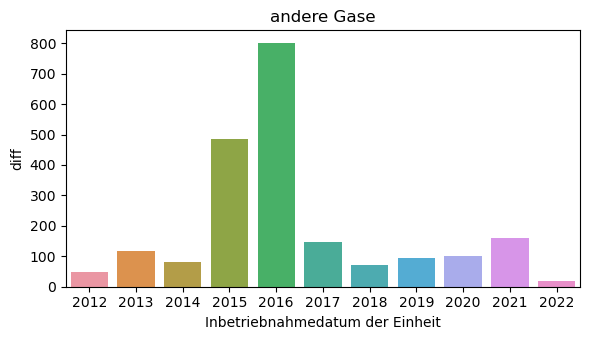

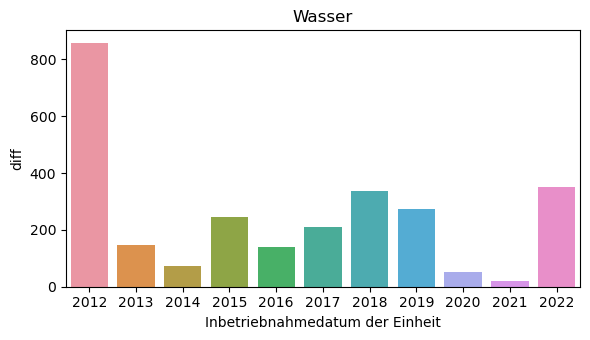

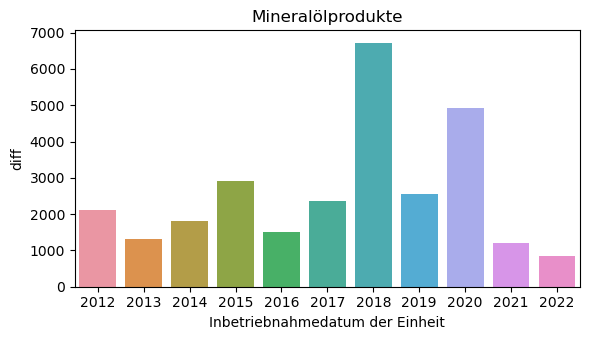

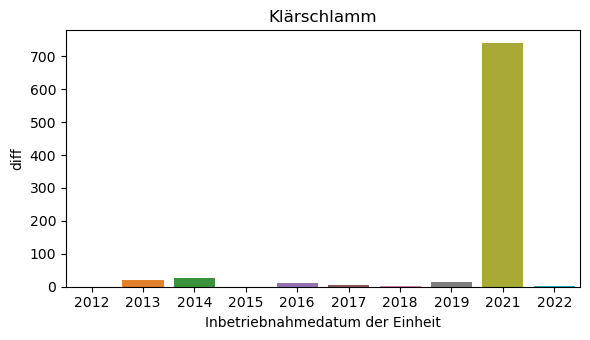

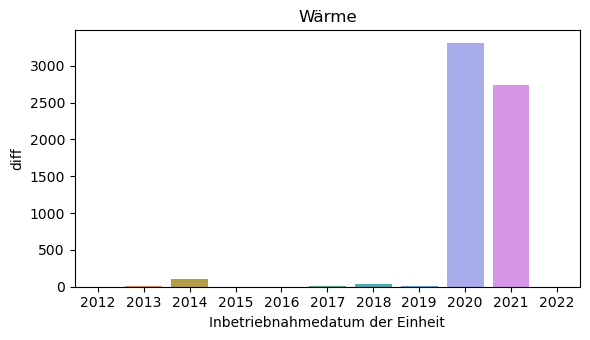

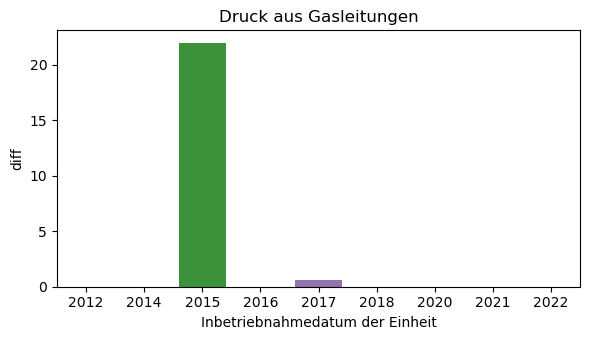

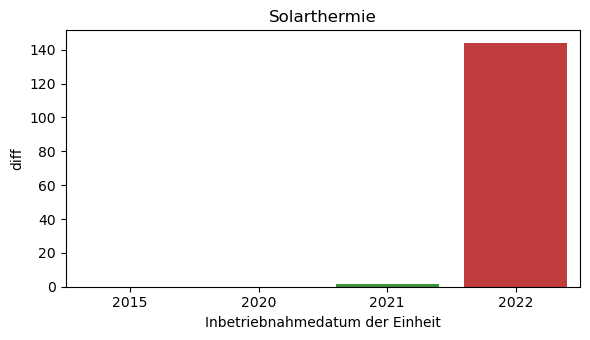

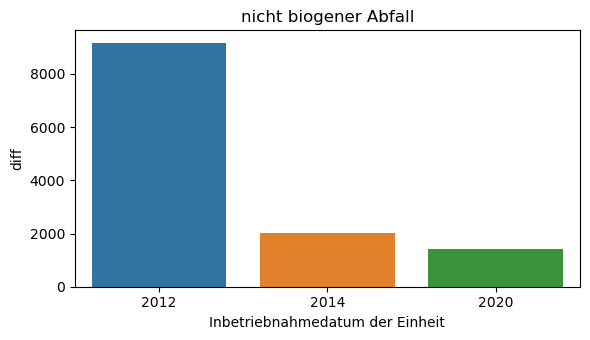

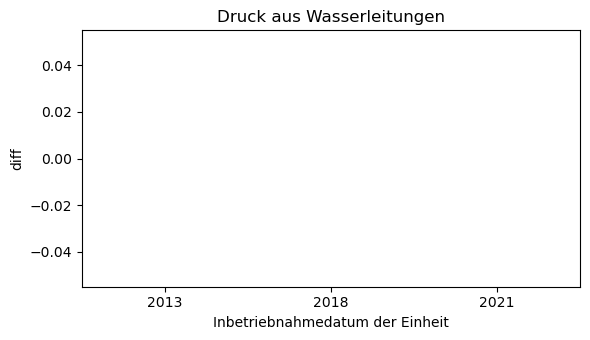

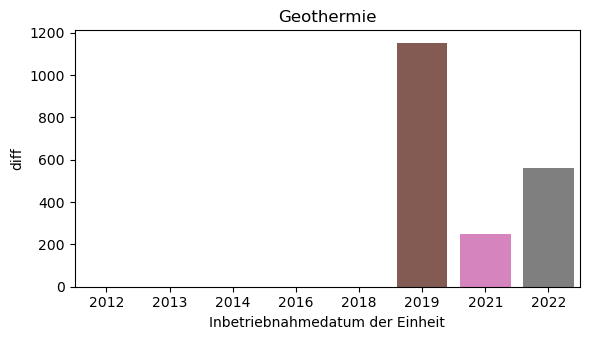

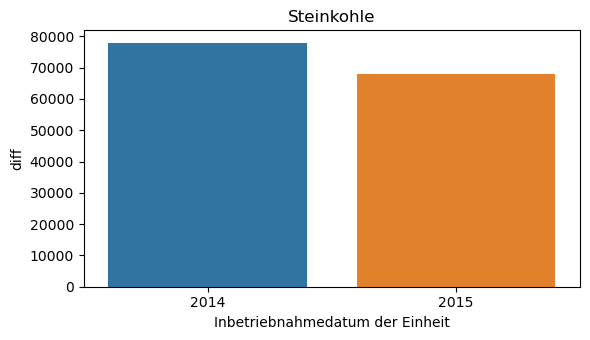

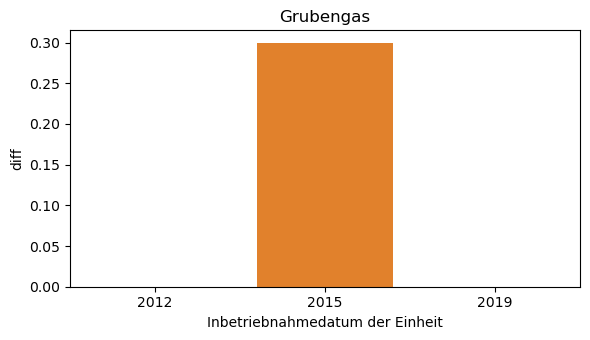

In [143]:

for energy_source in energy_sources:
    net_vs_gross_trend = df.copy()
    net_vs_gross_trend = net_vs_gross_trend[net_vs_gross_trend.Energieträger == energy_source]
    net_vs_gross_trend = convert_column_data_type(net_vs_gross_trend, float ,["Nettonennleistung der Einheit"])
    net_vs_gross_trend = convert_column_data_type(net_vs_gross_trend, float ,["Bruttoleistung der Einheit"])
    net_vs_gross_trend = net_vs_gross_trend[my_columns]
    net_vs_gross_trend["Inbetriebnahmedatum der Einheit"] = pd.to_datetime(
        net_vs_gross_trend["Inbetriebnahmedatum der Einheit"]
    ).dt.year
    net_trend = net_vs_gross_trend[["Nettonennleistung der Einheit", "Inbetriebnahmedatum der Einheit"]]
    gross_trend = net_vs_gross_trend[["Bruttoleistung der Einheit", "Inbetriebnahmedatum der Einheit"]]
    gross_trend = gross_trend.groupby(["Inbetriebnahmedatum der Einheit"]).sum()
    net_trend = net_trend.groupby(["Inbetriebnahmedatum der Einheit"]).sum()
    merged = pd.merge(gross_trend, net_trend, on='Inbetriebnahmedatum der Einheit', how='outer')
    merged["diff"] = merged["Bruttoleistung der Einheit"] - merged["Nettonennleistung der Einheit"]
    sns.barplot(data=merged, x=merged.index, y="diff")
    

    plt.savefig(energy_source+'bins.PNG')
    plt.title(energy_source)
    plt.show()


In [148]:
net_vs_gross_trend

,Betriebs-Status,Energieträger,Lage der Einheit,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Bundesland,Datum der geplanten Inbetriebnahme,Datum der endgültigen Stilllegung,Inbetriebnahmedatum der Einheit
487498,In Betrieb,Grubengas,NaN,90.0,90.0,Baden-Württemberg,NaN,NaN,2019
538100,In Betrieb,Grubengas,NaN,75.0,75.0,Bayern,NaN,NaN,2012
561958,In Betrieb,Grubengas,NaN,1.0,0.8,Baden-Württemberg,NaN,NaN,2015
564286,In Betrieb,Grubengas,NaN,50.0,50.0,Baden-Württemberg,NaN,NaN,2015
566434,In Betrieb,Grubengas,NaN,7.2,7.1,Baden-Württemberg,NaN,NaN,2015
746600,In Betrieb,Grubengas,NaN,50.0,50.0,Baden-Württemberg,NaN,NaN,2019


In [46]:

gross_trend = gross_trend.groupby(["Inbetriebnahmedatum der Einheit"]).sum()
net_trend = net_trend.groupby(["Inbetriebnahmedatum der Einheit"]).sum()
merged = pd.merge(gross_trend, net_trend, on='Inbetriebnahmedatum der Einheit', how='outer')

In [147]:
net_trend

,Nettonennleistung der Einheit
Inbetriebnahmedatum der Einheit,
2012,75.0
2015,57.9
2019,140.0


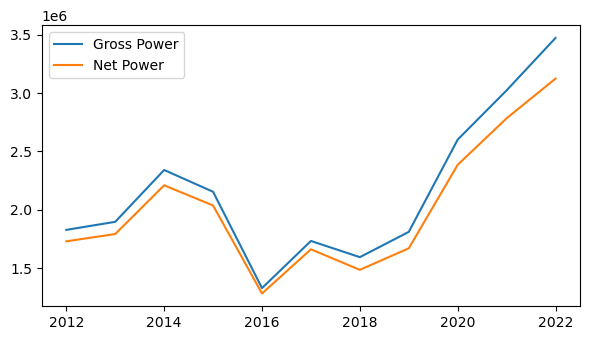

In [48]:
plt.rcParams["figure.figsize"] = [6.00, 3.50]
plt.plot(merged.index, merged["Bruttoleistung der Einheit"], label = "Gross Power")
plt.plot(merged.index, merged["Nettonennleistung der Einheit"] , label = "Net Power")
plt.legend()
plt.savefig('10-NetVsGrossTrend.PNG')
plt.show()

In [24]:
df = convert_column_data_type(filtered_data_operating, float ,["Bruttoleistung der Einheit"])
wind = df[df["Energieträger"] == "Solare Strahlungsenergie"]
solar = df[df["Energieträger"] == "Wind"]


In [25]:
solar["Bruttoleistung der Einheit"].describe()

count    1221.000000
mean     2495.572586
std      1052.762554
min         0.250000
25%      2400.000000
50%      2530.000000
75%      3075.000000
max      6000.000000
Name: Bruttoleistung der Einheit, dtype: float64

In [26]:
filtered_data_operating["Energieträger"].unique()

array(['Solare Strahlungsenergie', 'Speicher', 'Wind', 'Erdgas',
       'Biomasse', 'andere Gase', 'Wasser', 'Mineralölprodukte',
       'Klärschlamm', 'Wärme', 'Druck aus Gasleitungen', 'Solarthermie',
       'nicht biogener Abfall', 'Druck aus Wasserleitungen', 'Geothermie',
       'Steinkohle', 'Grubengas'], dtype=object)

In [152]:
types_columns = [
    "Nettonennleistung der Einheit",
    "Bruttoleistung der Einheit",
    "Inbetriebnahmedatum der Einheit",
    "Lage der Einheit"
]

In [154]:
types_df = df.copy()
types_df = types_df[types_df["Energieträger"] == "Solare Strahlungsenergie"]
types_df = types_df[types_columns]

In [160]:
types_df.dropna(inplace=True)
types_df

,Nettonennleistung der Einheit,Bruttoleistung der Einheit,Inbetriebnahmedatum der Einheit,Lage der Einheit
0,"8,2","9,99",10/19/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
1,6,"6,12",7/11/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
2,3,"4,16",7/19/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
3,15,"15,08",8/5/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
5,7,"7,02",7/7/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
...,...,...,...,...
799123,"29,7","29,7",1/29/2021,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
799125,3,"4,95",12/18/2020,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
799130,"4,08","4,08",12/17/2020,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
799132,"0,56","0,56",1/1/2021,Freifläche


In [164]:
unique_types = types_df["Lage der Einheit"]

In [179]:
occur = unique_types.to_frame().groupby(["Lage der Einheit"]).size()

In [203]:
occur = occur.to_frame()

In [293]:
# Bauliche Anlagen (Hausdach, Gebäude und Fassade)
print("Bauliche Anlagen (Hausdach, Gebäude und Fassade): ", round(538374 / 562308, 2) * 100, "%")

Bauliche Anlagen (Hausdach, Gebäude und Fassade):  96.0 %


In [240]:
others = occur.reset_index()

In [241]:
others = others[others["Lage der Einheit"] != "Bauliche Anlagen (Hausdach, Gebäude und Fassade)"]
others.set_index("Lage der Einheit", inplace=True)
others.rename( columns={0 :'count'}, inplace=True )

In [242]:
others

,count
Lage der Einheit,
Bauliche Anlagen (Sonstige),6189
Freifläche,2754
Steckerfertige Erzeugungsanlage (sog. Plug-In- oder Balkon-PV-Anlage),14991


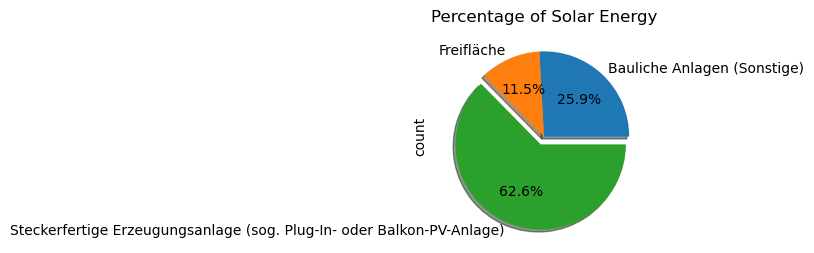

In [249]:
plot = others.plot.pie(y='count', title="Percentage of Solar Energy", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)
plot.figure.savefig("Percentage-General")

In [251]:
loss = df.copy()
loss = loss[loss["Energieträger"] == "Solare Strahlungsenergie"]
loss = loss[types_columns]

In [252]:
loss.dropna(inplace=True)
loss

,Nettonennleistung der Einheit,Bruttoleistung der Einheit,Inbetriebnahmedatum der Einheit,Lage der Einheit
0,"8,2","9,99",10/19/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
1,6,"6,12",7/11/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
2,3,"4,16",7/19/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
3,15,"15,08",8/5/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
5,7,"7,02",7/7/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
...,...,...,...,...
799123,"29,7","29,7",1/29/2021,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
799125,3,"4,95",12/18/2020,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
799130,"4,08","4,08",12/17/2020,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)"
799132,"0,56","0,56",1/1/2021,Freifläche


In [253]:
loss = convert_column_data_type(loss, float ,["Bruttoleistung der Einheit"])
loss = convert_column_data_type(loss, float ,["Nettonennleistung der Einheit"])

In [254]:
loss.dtypes

Nettonennleistung der Einheit      float64
Bruttoleistung der Einheit         float64
Inbetriebnahmedatum der Einheit     object
Lage der Einheit                    object
dtype: object

In [255]:
loss["diff"] = loss["Bruttoleistung der Einheit"] - loss["Nettonennleistung der Einheit"]
loss

,Nettonennleistung der Einheit,Bruttoleistung der Einheit,Inbetriebnahmedatum der Einheit,Lage der Einheit,diff
0,8.20,9.99,10/19/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)",1.79
1,6.00,6.12,7/11/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)",0.12
2,3.00,4.16,7/19/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)",1.16
3,15.00,15.08,8/5/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)",0.08
5,7.00,7.02,7/7/2016,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)",0.02
...,...,...,...,...,...
799123,29.70,29.70,1/29/2021,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)",0.00
799125,3.00,4.95,12/18/2020,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)",1.95
799130,4.08,4.08,12/17/2020,"Bauliche Anlagen (Hausdach, Gebäude und Fassade)",0.00
799132,0.56,0.56,1/1/2021,Freifläche,0.00


In [259]:
loss_percentage = loss.groupby(["Lage der Einheit"])["diff"].sum()

In [269]:
loss_percentage = loss_percentage.to_frame()

In [274]:
exclude = [
    "Steckerfertige Erzeugungsanlage (sog. Plug-In- oder Balkon-PV-Anlage)",
    "Bauliche Anlagen (Sonstige)"
]

In [276]:
loss_percentage

,diff
Lage der Einheit,
"Bauliche Anlagen (Hausdach, Gebäude und Fassade)",738846.480
Bauliche Anlagen (Sonstige),20424.975
Freifläche,523295.026
Steckerfertige Erzeugungsanlage (sog. Plug-In- oder Balkon-PV-Anlage),2924.912


In [277]:
loss_percentage = loss_percentage[~loss_percentage.index.isin(exclude)]
loss_percentage

,diff
Lage der Einheit,
"Bauliche Anlagen (Hausdach, Gebäude und Fassade)",738846.480
Freifläche,523295.026


- Bauliche Anlagen (Sonstige)	represents just 2%
- Steckerfertige Erzeugungsanlage (sog. Plug-In- oder Balkon-PV-Anlage) represents just 0.2%

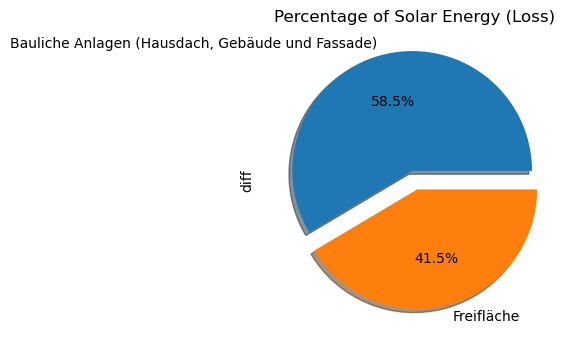

In [285]:
plot = loss_percentage.plot.pie(y='diff', title="Percentage of Solar Energy (Loss)", legend=False, \
                   autopct='%1.1f%%', explode=(0.08, 0.08), \
                   shadow=True, startangle=0)
plot.figure.savefig("Percentage-loss")
pass

### Power Loss Per Station

In [89]:
loss_columns = [
    "Nettonennleistung der Einheit",
    "Bruttoleistung der Einheit",
    "Inbetriebnahmedatum der Einheit",
]

In [90]:
p_loss = df.copy()
p_loss = p_loss[p_loss["Energieträger"] == "Solare Strahlungsenergie"]
p_loss = p_loss[p_loss["Lage der Einheit"] == "Freifläche"]
p_loss = p_loss[loss_columns]
p_loss.dropna(inplace=True)

In [91]:
p_loss = convert_column_data_type(p_loss, float ,["Bruttoleistung der Einheit"])
p_loss = convert_column_data_type(p_loss, float ,["Nettonennleistung der Einheit"])

In [92]:
p_loss["Inbetriebnahmedatum der Einheit"] = pd.to_datetime(
    p_loss["Inbetriebnahmedatum der Einheit"]
)

In [93]:
p_loss["year"] = p_loss["Inbetriebnahmedatum der Einheit"].dt.year

In [94]:
stats = p_loss.groupby(["year"]).sum()

In [95]:
stats["loss"] = (1 - (stats["Nettonennleistung der Einheit"] / stats["Bruttoleistung der Einheit"])) * 100

In [96]:
stats

,Nettonennleistung der Einheit,Bruttoleistung der Einheit,loss
year,,,
2000,105.400,109.810,4.016028
2001,1469.810,1911.100,23.090890
2002,12265.428,14820.122,17.238009
2003,2891.191,3223.886,10.319689
2004,23034.082,26606.692,13.427487
2005,52449.786,59192.772,11.391570
2006,45930.697,49191.308,6.628429
2007,99438.210,109664.262,9.324872
2008,93679.217,100681.999,6.955347


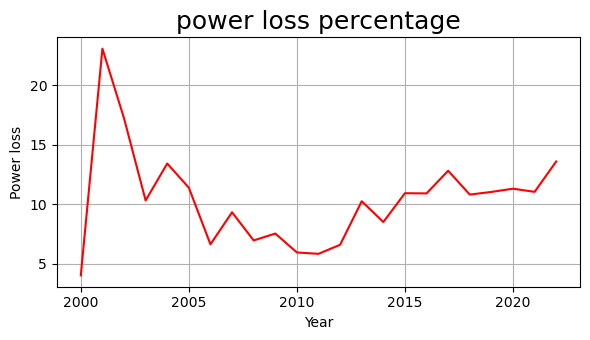

In [101]:
plt.plot(stats.index, stats["loss"], label = "Gross Power", color="r")
plt.ylabel('Power loss')
plt.xlabel('Year')
plt.title('power loss percentage', fontsize=18)
plt.grid(True)
plt.savefig('final/9-powerloss.PNG')

In [388]:
stats = p_loss.groupby(["year"]).count()

In [389]:
stats["count"] = p_loss.groupby(["year"]).count()["Inbetriebnahmedatum der Einheit"]

In [390]:
stats

,Nettonennleistung der Einheit,Bruttoleistung der Einheit,Inbetriebnahmedatum der Einheit,count
year,,,,
2012,301,301,301,301
2013,250,250,250,250
2014,80,80,80,80
2015,79,79,79,79
2016,45,45,45,45
2017,138,138,138,138
2018,270,270,270,270
2019,325,325,325,325
2020,428,428,428,428


In [391]:
p_loss["diff"] = p_loss["Bruttoleistung der Einheit"] - p_loss["Nettonennleistung der Einheit"]

In [392]:
stats["loss"] = p_loss.groupby(["year"]).sum("diff")["diff"]

In [433]:
stats

,count,loss,average_loss_per_station,percentage_loss
year,,,,
2012,301,28487.547,94.0,NaN
2013,250,40611.335,162.0,NaN
2014,80,8066.093,100.0,NaN
2015,79,13334.465,168.0,NaN
2016,45,7472.251,166.0,NaN
2017,138,23307.832,168.0,NaN
2018,270,33897.109,125.0,NaN
2019,325,46248.803,142.0,NaN
2020,428,74473.405,174.0,NaN


In [431]:
x = 1 - (p_loss["Nettonennleistung der Einheit"] / p_loss["Bruttoleistung der Einheit"])

In [432]:
x

659       0.013807
692       0.089858
1723      0.078526
2376      0.054224
2435      0.034061
            ...   
798333    0.053030
798334    0.053030
798336    0.053030
799018    0.159748
799132    0.000000
Length: 2754, dtype: float64

In [421]:
stats

,count,loss,average_loss_per_station,percentage_loss
year,,,,
2012,301,28487.547,94.0,NaN
2013,250,40611.335,162.0,NaN
2014,80,8066.093,100.0,NaN
2015,79,13334.465,168.0,NaN
2016,45,7472.251,166.0,NaN
2017,138,23307.832,168.0,NaN
2018,270,33897.109,125.0,NaN
2019,325,46248.803,142.0,NaN
2020,428,74473.405,174.0,NaN


In [393]:
stats.drop([
    "Nettonennleistung der Einheit",
    "Bruttoleistung der Einheit",
    "Inbetriebnahmedatum der Einheit"
], axis = 1, inplace=True)

In [396]:
stats["average_loss_per_station"] = stats["loss"] // stats["count"]

In [398]:
stats

,count,loss,average_loss_per_station
year,,,
2012,301,28487.547,94.0
2013,250,40611.335,162.0
2014,80,8066.093,100.0
2015,79,13334.465,168.0
2016,45,7472.251,166.0
2017,138,23307.832,168.0
2018,270,33897.109,125.0
2019,325,46248.803,142.0
2020,428,74473.405,174.0


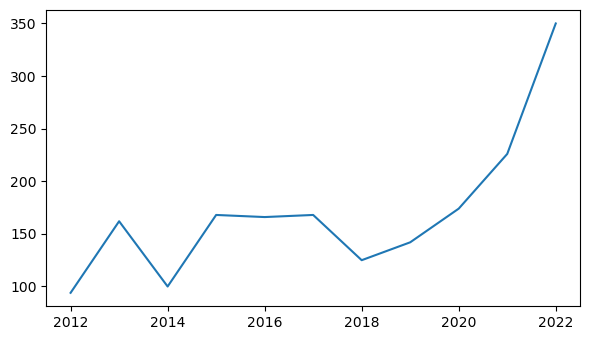

In [406]:
plt.plot(stats.index, stats["average_loss_per_station"], label = "Gross Power")
plt.savefig('out2.PNG')

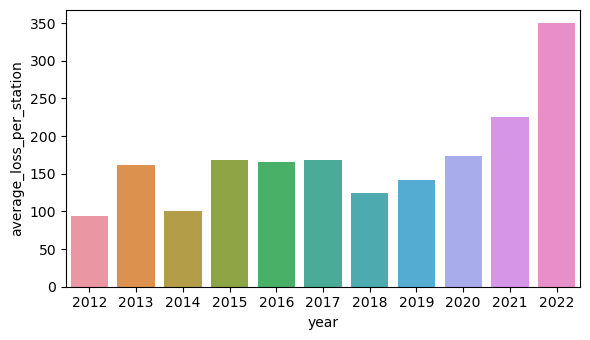

In [404]:
plot = sns.barplot(data=stats, x=stats.index, y="average_loss_per_station")
fig = plot.get_figure()
fig.savefig("out.png") 